In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
from source.utils import transform_dict_col_to_col

In [40]:
# load data
df_portfolio = pd.read_json('../data/portfolio.json', lines=True)
df_profile = pd.read_json('../data/profile.json', lines=True)
df_transcript = pd.read_json('../data/transcript.json', lines=True)

### Portfolio Dataset

**Description**  
containing offer ids and meta data about each offer (duration, type, etc.)

**Schema**  
id (string) - offer id  
offer_type (string) - type of offer ie BOGO (buy one get one free), discount, informational  
difficulty (int) - minimum required spend to complete an offer  
reward (int) - reward given for completing an offer  
duration (int) - time for offer to be open, in days  
channels (list of strings)

In [41]:
df_portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [42]:
df_portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 612.0+ bytes


In [43]:
df_portfolio.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


In [44]:
df_portfolio['channels'].value_counts()

channels
[web, email, mobile, social]    4
[web, email, mobile]            3
[email, mobile, social]         2
[web, email]                    1
Name: count, dtype: int64

In [45]:
df_portfolio['offer_type'].value_counts()

offer_type
bogo             4
discount         4
informational    2
Name: count, dtype: int64

### Profile Dataset

**Description**  
demographic data for each customer

**Schema**   
age (int) - age of the customer  
became_member_on (int) - date when customer created an app account  
gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)  
id (str) - customer id  
income (float) - customer's income  

In [46]:
# Transform became_member_on to dtype datetime
df_profile['became_member_on'] = pd.to_datetime(df_profile['became_member_on'], format='%Y%m%d')

In [47]:
df_profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN


In [48]:
df_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14825 non-null  object        
 1   age               17000 non-null  int64         
 2   id                17000 non-null  object        
 3   became_member_on  17000 non-null  datetime64[ns]
 4   income            14825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 664.2+ KB


In [49]:
df_profile.describe()

,age,became_member_on,income
count,17000.000000,17000,14825.000000
mean,62.531412,2017-02-23 13:12:10.164706048,65404.991568
min,18.000000,2013-07-29 00:00:00,30000.000000
25%,45.000000,2016-05-26 00:00:00,49000.000000
50%,58.000000,2017-08-02 00:00:00,64000.000000
75%,73.000000,2017-12-30 00:00:00,80000.000000
max,118.000000,2018-07-26 00:00:00,120000.000000
std,26.738580,NaN,21598.299410


In [50]:
df_profile['gender'].value_counts()

gender
M    8484
F    6129
O     212
Name: count, dtype: int64

(array([1308., 1438., 2054., 3383., 3257., 2031.,  966.,  361.,   27.,
        2175.]),
 array([ 18.,  28.,  38.,  48.,  58.,  68.,  78.,  88.,  98., 108., 118.]),
 <BarContainer object of 10 artists>)

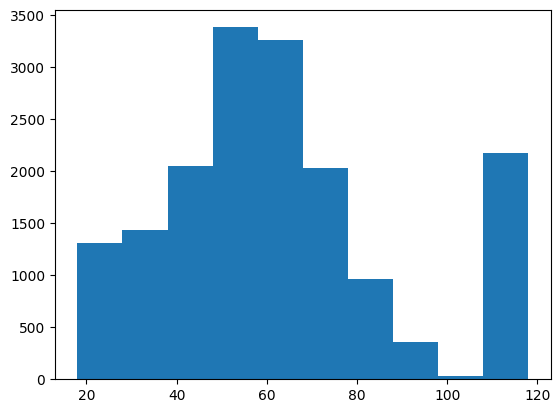

In [51]:
plt.hist(df_profile['age'])

#### Checking users with age over 100 years

Turns out that there are 5 people at age 101 years old which seems valid.  
But there are also 2175 persons with age 118 which doesn't seem correct. Nobody of these users declared their gender nor income. Thus, I don't see any value in keeping these and assume it's better to drop these instances from the dataset. 

In [52]:
# check values over 100 years. Doesn't seem right
df_profile_age100 = df_profile[df_profile['age'] == 101]
print(df_profile_age100.describe())
print('\nGender values:', df_profile_age100['gender'].value_counts())

         age     became_member_on        income
count    5.0                    5      5.000000
mean   101.0  2017-03-21 19:12:00  67800.000000
min    101.0  2015-05-26 00:00:00  43000.000000
25%    101.0  2017-03-09 00:00:00  56000.000000
50%    101.0  2017-10-04 00:00:00  59000.000000
75%    101.0  2017-11-09 00:00:00  82000.000000
max    101.0  2017-11-27 00:00:00  99000.000000
std      0.0                  NaN  22398.660674

Gender values: gender
F    5
Name: count, dtype: int64


In [53]:
df_profile.drop(df_profile[df_profile['age'] == 118].index, inplace=True)
df_profile.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14825 non-null  object        
 1   age               14825 non-null  int64         
 2   id                14825 non-null  object        
 3   became_member_on  14825 non-null  datetime64[ns]
 4   income            14825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 694.9+ KB


(array([1731., 1707., 2234., 2210., 2345., 1435., 1215.,  990.,  498.,
         460.]),
 array([ 30000.,  39000.,  48000.,  57000.,  66000.,  75000.,  84000.,
         93000., 102000., 111000., 120000.]),
 <BarContainer object of 10 artists>)

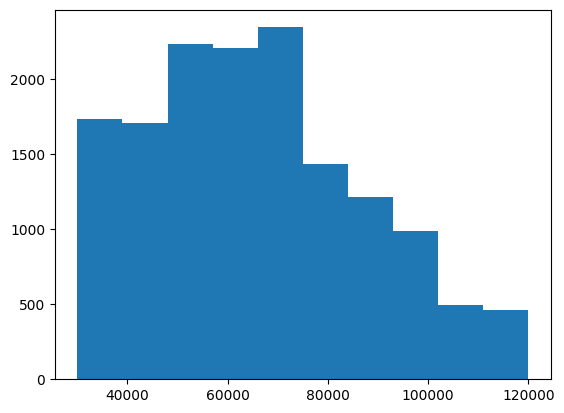

In [54]:
plt.hist(df_profile['income'])

(array([1169., 1087., 1462., 2338., 2894., 2490., 1890.,  917.,  446.,
         132.]),
 array([ 18. ,  26.3,  34.6,  42.9,  51.2,  59.5,  67.8,  76.1,  84.4,
         92.7, 101. ]),
 <BarContainer object of 10 artists>)

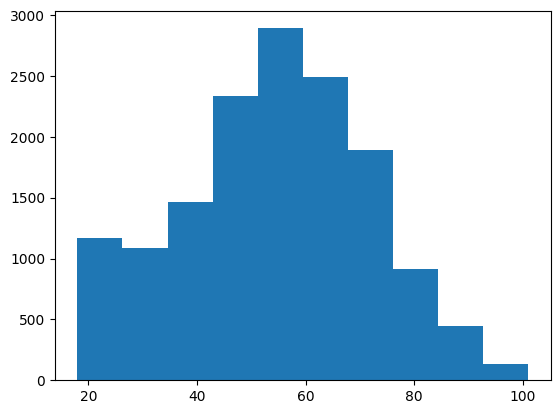

In [55]:
plt.hist(df_profile['age'])

### Transcript Dataset

**Description**  
records for transactions, offers received, offers viewed, and offers completed

**Schema**  
event (str) - record description (ie transaction, offer received, offer viewed, etc.)
person (str) - customer id
time (int) - time in hours since start of test. The data begins at time t=0
value - (dict of strings) - either an offer id or transaction amount depending on the record

In [56]:
df_transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [57]:
# extract dict values from value column
df_transcript = transform_dict_col_to_col(df = df_transcript, dict_column='value', dict_key='offer_id')
df_transcript

TypeError: transform_dict_col_to_col.<locals>.extract_value() missing 1 required positional argument: 'dict_column'

In [ ]:
df_transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [ ]:
df_transcript['event'].value_counts()

event
transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: count, dtype: int64

In [ ]:
df_transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [ ]:
df_transcript['value']

0         {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1         {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2         {'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3         {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4         {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
                                ...                       
306529                      {'amount': 1.5899999999999999}
306530                                    {'amount': 9.53}
306531                                    {'amount': 3.61}
306532                      {'amount': 3.5300000000000002}
306533                                    {'amount': 4.05}
Name: value, Length: 306534, dtype: object